### Data exploration of the WiDS Competition 2018
The goal is to predict, given a certain data entry, whether the person is a woman or not. 

This is a simple data exploration to see what we've got. 

* two classes: woman / not a woman
* 1234 features (apply PCA?)
* not all of the data is provided - lot's cells containing NaN



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
%matplotlib inline

In [2]:
train_data_file = "train.csv"
test_data_file = "test.csv"

In [3]:
# Set up the dataframes for the training and test data
train = pd.read_csv(train_data_file)
test = pd.read_csv(test_data_file)

/Library/Python/2.7/site-packages/pandas-0.15.2-py2.7-macosx-10.10-intel.egg/pandas/io/parsers.py:1159: DtypeWarning: Columns (12,49,51,56,91,126,145,163,165,166,167,168,169,171,173,174,176,177,242,244,246,248,252,255,274,290,291,292,294,295,296,332,344,366,374,376,397,414,440,491,620,634,639,642,643,645,710,713,760,769,810,829,929,954,979,1001,1002,1003,1004,1005,1024,1037,1041,1043,1062,1086,1099,1100,1121,1129,1136,1152,1153,1166,1168,1182,1193,1204,1205,1207,1208,1216,1226,1228,1230,1232,1234) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)
/Library/Python/2.7/site-packages/pandas-0.15.2-py2.7-macosx-10.10-intel.egg/pandas/io/parsers.py:1159: DtypeWarning: Columns (11,13,48,50,55,90,125,144,162,163,164,166,168,169,170,171,172,174,176,241,243,245,247,251,254,273,289,291,292,293,295,296,312,313,314,331,343,365,373,375,396,413,439,490,619,623,630,633,638,642,644,669,712,759,768,788,809,828,928,953,978,1000,1001,1002,1003,1004

In [4]:
print(train.shape)
print(test.shape)

(18255, 1235)
(27285, 1234)


In [5]:
train.describe()

,train_id,AA3,AA4,AA5,AA6,AA7,AA14,AA15,DG1,is_female,...,LN1B,LN2_1,LN2_2,LN2_3,LN2_4,GN1,GN2,GN3,GN4,GN5
count,18255.000000,18255.000000,18255.000000,5653.000000,12602.000000,18255.000000,18255.000000,18255.000000,18255.000000,18255.000000,...,18255.000000,18255.000000,18255.000000,18255.000000,18255.000000,14230.000000,18255.000000,18255.000000,18255.000000,18255.000000
mean,9127.000000,2.371460,28.558313,3.138864,6.793525,291360.681676,8030.510600,352.038346,1978.073185,0.537113,...,2.397316,2.145330,2.151575,2.830731,2.835881,5.590654,6.763079,7.421912,8.925883,8.817365
std,5269.908918,1.130523,9.822629,1.361434,0.769568,98126.483799,22061.608061,179.744071,14.740675,0.498634,...,1.231487,1.407641,1.407021,1.594319,1.592863,18.210791,20.537281,21.752528,24.523345,24.413247
min,0.000000,1.000000,11.000000,1.000000,6.000000,111011.000000,96.000000,24.000000,1917.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4563.500000,1.000000,21.000000,2.000000,6.000000,216071.000000,949.000000,178.000000,1969.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,9127.000000,2.000000,31.000000,3.000000,7.000000,313011.000000,2902.000000,354.000000,1981.000000,1.000000,...,2.000000,1.000000,1.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,13690.500000,3.000000,34.000000,4.000000,7.000000,348181.000000,4609.000000,523.000000,1990.000000,1.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000
max,18254.000000,4.000000,44.000000,5.000000,8.000000,448051.000000,99999.000000,633.000000,2001.000000,1.000000,...,4.000000,5.000000,5.000000,5.000000,5.000000,99.000000,99.000000,99.000000,99.000000,99.000000


In [6]:
train.head(5)

,train_id,AA3,AA4,AA5,AA6,AA7,AA14,AA15,DG1,is_female,...,GN1,GN1_OTHERS,GN2,GN2_OTHERS,GN3,GN3_OTHERS,GN4,GN4_OTHERS,GN5,GN5_OTHERS
0,0,3,32,3,NaN,323011,3854,481,1975,1,...,99,NaN,99,NaN,99,NaN,99,NaN,99,NaN
1,1,2,26,NaN,8,268131,2441,344,1981,1,...,NaN,NaN,1,NaN,2,NaN,2,NaN,2,NaN
2,2,1,16,NaN,7,167581,754,143,1995,1,...,1,NaN,2,NaN,2,NaN,2,NaN,2,NaN
3,3,4,44,5,NaN,445071,5705,604,1980,1,...,NaN,NaN,2,NaN,2,NaN,99,NaN,99,NaN
4,4,4,43,NaN,6,436161,5645,592,1958,1,...,NaN,NaN,1,NaN,1,NaN,1,NaN,1,NaN


In [7]:
# Spliting the training and testing data in input and output variables
female = "is_female"

train_X = train.loc[:, train.columns != female]
train_Y = train[female]

test_X = test

In [8]:
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)

(18255, 1234)
(18255,)
(27285, 1234)


In [9]:
# One more thing before I turn in: can I show a correlation between a column and a peron being a woman?
train_X.columns

Index([u'train_id', u'AA3', u'AA4', u'AA5', u'AA6', u'AA7', u'AA14', u'AA15', u'DG1', u'DG3', u'DG3A', u'DG3A_OTHERS', u'DG4', u'DG4_OTHERS', u'DG5_1', u'DG5_2', u'DG5_3', u'DG5_4', u'DG5_5', u'DG5_6', u'DG5_7', u'DG5_8', u'DG5_9', u'DG5_10', u'DG5_11', u'DG5_96', u'DG6', u'DG8a', u'DG8b', u'DG8c', u'DG9a', u'DG9b', u'DG9c', u'DG10b', u'DG10c', u'DG11b', u'DG11c', u'DG12B_1', u'DG12B_2', u'DG12C_1', u'DG12C_2', u'DG13_1', u'DG13_2', u'DG13_3', u'DG13_4', u'DG13_5', u'DG13_96', u'DG13_7', u'DG13_OTHERS', u'DG14', u'DG14_OTHERS', u'DL0', u'DL1', u'DL1_OTHERS', u'DL2', u'DL2_23_OTHERS', u'DL2_96_OTHERS', u'DL3', u'DL4_1', u'DL4_2', u'DL4_3', u'DL4_4', u'DL4_5', u'DL4_6', u'DL4_7', u'DL4_8', u'DL4_9', u'DL4_10', u'DL4_11', u'DL4_12', u'DL4_13', u'DL4_14', u'DL4_15', u'DL4_16', u'DL4_17', u'DL4_18', u'DL4_19', u'DL4_20', u'DL4_21', u'DL4_22', u'DL4_23', u'DL4_96', u'DL4_99', u'DL4_OTHERS', u'DL5', u'DL6', u'DL7', u'DL8', u'DL11', u'DL12', u'DL12_OTHERS', u'DL13', u'DL14', u'DL15', u'DL16', 

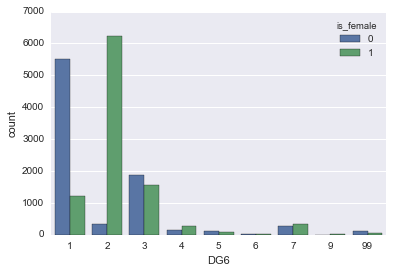

In [10]:
# Can relation to the head of the house have a relation to the gender? It seems not
# 1=Myself
# 2=Spouse
# 3=Son/Daughter
# 4=Father/Mother
# 5=Sister/Brother
# 6=Grandchild
# 7=Other relative
# 9=Other non-relative
# 99=DK
fig = sns.countplot(x=train.DG6, hue=train.is_female)

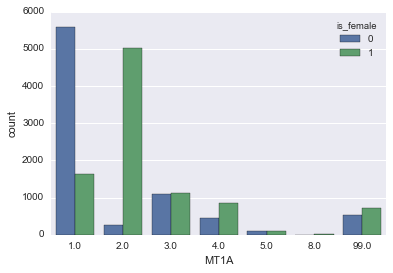

In [11]:
# Who decides who should have a phone in the house? 
# 1=Myself
# 2=My spouse 
# 3=My parents/guardian
# 4=My child (children) 
# 5=Brother
# 8=Sister
# 99=DK
fig = sns.countplot(x=train.MT1A, hue=train.is_female)


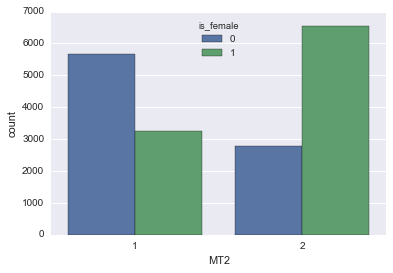

In [12]:
# Do you personally own a phone? 1 = Yes, 2 = No
fig = sns.countplot(x=train.MT2, hue=train.is_female)

In [17]:
m = 18255 - sum(train.is_female)
f = sum(train.is_female)

print("Female:",f, "Male:", m)

('Female:', 9805, 'Male:', 8450)


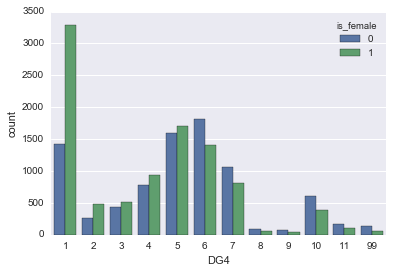

In [20]:
fig = sns.countplot(x=train.DG4, hue=train.is_female)
# 1=Illiterate- no formal education
# 2=Literate without formal education ( knows how to read and write but has not formally studied in a school)
# 3=Below Primary Schooling (Schooling till standard 4th) 
# 4=Primary (Schooling till standard 5th)
# 5=Middle (Schooling till standard 6th-8th)
# 6=Matriculation/Secondary (schooling till standard 10th )
# 7=Higher secondary (schooling till standard 12th )/ Intermediate/Pre University/ Senior Secondary
# 8=Non technical diploma or certificate not equal to degree
# 9=Technical diploma or certificate not equal to degree
# 10=Graduate
# 11=Post Graduate and above
# 96=Other (Specify)
# 99=DK

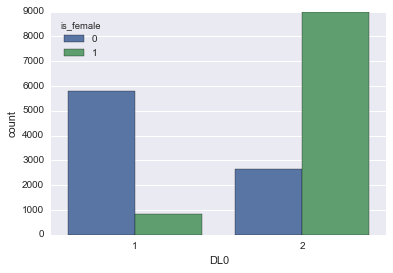

In [26]:
fig = sns.countplot(x=train.DL0, hue=train.is_female)

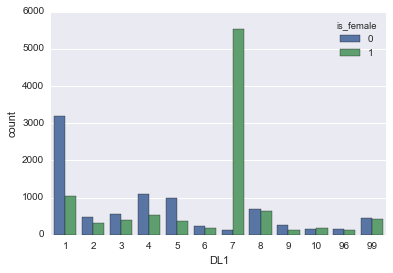

In [27]:
fig = sns.countplot(x=train.DL1, hue=train.is_female)

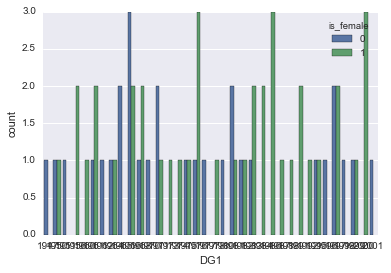

In [29]:
fig = sns.countplot(x=train.DG1[30:100], hue=train.is_female[30:100])